Analysis of two-port RC data

VNA -> patch pannel -> antennas. Calibration plane is right before the antenna. Uses calibration file SOLT250M-1050M4501pt_4_14_25.cal (except High res which uses SOLT300M-320M4001pt_4_11_25.cal. This calibration may be bad). Big vivaldi is port 2. log periodic is port 1. 

The stirrer has 4800 steps per 360 degrees. This comes from 400 steps/rotation of the stepper motor, 4x microsteps, and a 3:1 gear ratio. 400 $\times$ 4 $\times$ 3 = 4800 steps/rev. We have invested a week in calibration using this number of microsteps, so it is hard coded and will likley never change

In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

# Plotting format 
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

directory = './data_gitignore/'

In [514]:
# Load the DataFrame from CSV
if 0: # high resolution = 5kHz. 300-320MHz span, 4000 frequency points. 
    # stirPos 1272 and 1896 dropped some frequency points! 
    df_HR   = pd.read_csv(directory 
        + "2portRcTest_300MHz_4_14_25_200Steps.csv")
    df_HR[["S11", "S12", "S22"]] = df_HR[["S11", "S12", "S22"]].astype(complex)       

if 0: # 177.8kHz resolution (sorry), 250-1050MHz, 4500 frequency points
    df      = pd.read_csv(directory 
        + "2portRcTest_250_1050MHz_200steps_4_14_25.csv")
    df[["S11", "S12", "S22"]] = df[["S11", "S12", "S22"]].astype(complex)  

    df_cp   = pd.read_csv(directory 
        + "2portRcTest_250_1050MHz_200steps_crossPolarizeVivaldi_4_14_25.csv")   # same as above, but vivaldi is cross polarized (by eye)
    df_cp[["S11", "S12", "S22"]] = df_cp[["S11", "S12", "S22"]].astype(complex)

    df_couple   = pd.read_csv(directory 
        + "antennaFacingEachOther_200Step_5secDwell_250_1050MHz_4501freq_2p5kHzRBW_avg1_4_16_25.csv")   # same setings as above, but antennas are coupled by facing each other. 50cm apart polarization matched
    df_couple[["S11", "S12", "S22"]] = df_couple[["S11", "S12", "S22"]].astype(complex)



if 0: # reprroducibility test. Same settings, taken one after another. 10 steps, 250-1050MHz
    df_rep1      = pd.read_csv(directory 
        + "10StepReproducibility_v1_10secDwell_4_15_25.csv")  
    df_rep1[["S11", "S12", "S22"]] = df_rep1[["S11", "S12", "S22"]].astype(complex)
    df_rep2      = pd.read_csv(directory 
        + "10StepReproducibility_v2_10secDwell_4_15_25.csv")  
    df_rep2[["S11", "S12", "S22"]] = df_rep2[["S11", "S12", "S22"]].astype(complex)
    df_rep3      = pd.read_csv(directory 
        + "10StepReproducibility_v3_10secDwell_4_15_25.csv")  
    df_rep3[["S11", "S12", "S22"]] = df_rep3[["S11", "S12", "S22"]].astype(complex)
if 0: # reprroducibility test. Same settings, taken one after another. 5 sec dwell 10 steps, 250-1050MHz
    df_rep4      = pd.read_csv(directory 
        + "10StepReproducibility_v4_5secDwell_4_16_25.csv")  
    df_rep4[["S11", "S12", "S22"]] = df_rep4[["S11", "S12", "S22"]].astype(complex)
    df_rep5      = pd.read_csv(directory 
        + "10StepReproducibility_v5_5secDwell_4_16_25.csv")  
    df_rep5[["S11", "S12", "S22"]] = df_rep5[["S11", "S12", "S22"]].astype(complex)
if 0: # 600 steps  Same settings as above. Same ant pos as rep4 and rep 5. 5 sec dwell 250-1050MHz
    df_600Steps      = pd.read_csv(directory 
        + "600Step_5secDwell_250_1050MHz_4501freq_2p5kHzRBW_avg1_4_16_25.csv")  
    df_600Steps[["S11", "S12", "S22"]] = df_600Steps[["S11", "S12", "S22"]].astype(complex)

#load norris free space measurements and data sheet
path = "./data_gitignore/freeSpaceData_4_22_25_NSB/"
VivaldiParallel = pd.read_csv(path + "VivaldiS11MagnitudeParallelPolarization.csv")
VivaldiPerpendicular = pd.read_csv(path + "VivaldiS11MagnitudePerpendicularPolarization.csv")
VivaldiSWRDatasheet = pd.read_csv(path + "VivaldiVSWRDatasheet.csv", header=None)

SVivaldiParallel = pd.read_csv(path + "SmallVivaldiS11MagnitudeParallelPolarization.csv")
SVivaldiPerpendicular = pd.read_csv(path + "SmallVivaldiS11MagnitudePerpendicularPolarization.csv")
sVivaldiSWRDatasheet = pd.read_csv(path + "SmallVivaldiVSWRDatasheet.csv", header=None)

LPParallel = pd.read_csv(path + "LPS11MagnitudeParallelPolarization.csv")
LPPerpendicular = pd.read_csv(path + "LPS11MagnitudePerpendicularPolarization.csv")
LPDatasheet = pd.read_csv(path + "LPVSWRDatasheet.csv", header=None)

# --- Vivaldi antenna ---
Vivaldi_df = pd.DataFrame({
    "Frequency": VivaldiParallel["Frequency"],
    "S11_par" : VivaldiParallel["S11_Magnitude"],
    "S11_Perp": VivaldiPerpendicular["S11_Magnitude"],
})
Vivaldi_df["S11_avg"] = 20*np.log10(((10**(Vivaldi_df["S11_par"]/20)) + (10**(Vivaldi_df["S11_Perp"]/20)))/ 2)

# --- Small Vivaldi antenna ---
SmallVivaldi_df = pd.DataFrame({
    "Frequency": SVivaldiParallel["Frequency"],
    "S11_par" : SVivaldiParallel["S11_Magnitude"],
    "S11_Perp": SVivaldiPerpendicular["S11_Magnitude"],
})
SmallVivaldi_df["S11_avg"] = 20*np.log10(((10**(SmallVivaldi_df["S11_par"]/20)) + (10**(SmallVivaldi_df["S11_Perp"]/20)))/ 2)

# --- LP antenna ---
LP_df = pd.DataFrame({
    "Frequency": LPParallel["Frequency"],
    "S11_par" : LPParallel["S11_Magnitude"],
    "S11_Perp": LPPerpendicular["S11_Magnitude"],
})
LP_df["S11_avg"]     = 20*np.log10(((10**(LP_df["S11_par"]/20)) + (10**(LP_df["S11_Perp"]/20)))/ 2)



print(df_couple.head())
print(SmallVivaldi_df.head())
#print(df_rep2.head())

   stirPos    Freq_MHz                 S11                 S12  \
0        0  250.000000  0.532774-0.350030j  0.216402-0.023878j   
1        0  250.177777  0.448733-0.380339j  0.236118-0.124533j   
2        0  250.355555  0.402973-0.326899j  0.188476-0.218701j   
3        0  250.533333  0.419365-0.269314j  0.103244-0.268641j   
4        0  250.711111  0.460512-0.245815j  0.023530-0.271644j   

                  S22  
0  0.339106-0.666515j  
1  0.323203-0.605366j  
2  0.343841-0.562922j  
3  0.374631-0.555551j  
4  0.377214-0.570338j  
   Frequency   S11_par  S11_Perp   S11_avg
0  250000000 -9.161625 -9.182636 -9.172124
1  251277777 -9.451560 -9.473944 -9.462745
2  252555555 -9.664408 -9.694780 -9.679581
3  253833333 -9.798742 -9.832357 -9.815533
4  255111111 -9.847859 -9.884345 -9.866083


In [512]:
SmallVivaldi_df.plot(
    x="Frequency",
    y=["S11_par", "S11_Perp", "S11_avg"],
    figsize=(6, 4),
    lw=1.2,
)
datashee



plt.grid(True, ls=":")
plt.ylabel("|S11|  [dB]")
plt.tight_layout()
plt.show()

In [467]:
# The VNA sometimes drops frequency points. Not that big of an issue, but should know about it. 
# check how many freq points.

dfName = df_couple

for stirPos, group in dfName.groupby("stirPos"):
    freq_array = group["Freq_MHz"].values  # Get the frequency array as a numpy array
    if len(freq_array) != 4501:
        print(f"ERROR!!! stirPos {stirPos}: {len(freq_array)} frequency points at stirPos = {stirPos}")
    #print(f"stirPos {stirPos}: {len(freq_array)} frequency points")
    

In [468]:
#functions

def get_s_at_frequency(target_freq, df, s_parameter, printFreq = True):
    """
    Extracts and returns an array of S-parameter values (complex) from the DataFrame at the frequency
    closest to the given target_freq.
    Prints the actual frequency used. 
    
    Parameters:
      target_freq (float): The target frequency (in MHz) for which S-parameter values are needed.
      df (pd.DataFrame): The DataFrame containing the data. This DataFrame is expected to
                         have columns "Sweep time", "Freq_MHz", "S12", "S11", and "S22".
        s_parameter (string): s-parameter to be extracted. accepts S11, S22 or S12. 
                         
    Returns:
      stirPos (np.ndarray): array of stirrer position in units of steps from zero
      S_parameter (np.ndarray): Array of S-parameter values (complex) corresponding to the frequency closest to target_freq,
                  one per unique "Sweep time" in the DataFrame.
    """
    s_values = []
    
    # Group the dataframe by "Sweep time", so that each group represents a separate sweep.
    groups = df.groupby("stirPos")
    # For each sweep, find the row where Freq_MHz is closest to target_freq.
    for sweep_time, group in groups:
        # Calculate the absolute difference between the frequencies and target_freq.
        diff = (group["Freq_MHz"] - target_freq).abs()
        # Get the index of the smallest difference.
        closest_index = diff.idxmin()
        # Extract the S12 value at that index.
        s_val = group.loc[closest_index, s_parameter]
        # Ensure the value is a complex number (if it's a string, convert it).
        if isinstance(s_val, str):
            s_val = complex(s_val)
        s_values.append(s_val)
    if printFreq == True:
        print("Closest frequency:", group.loc[closest_index, "Freq_MHz"], "MHz")
    return pd.unique(df['stirPos']), np.array(s_values)



In [469]:
#general plotting of S vs freq for a given list of positions

# Specify the list of sweeps you want to plot.
posArr = [1272]

# Create a new figure.
plt.figure(figsize=(10, 6))

# Group the data by sweep number and plot only the selected sweeps.
for sweep, group in df.groupby("stirPos"):
    if sweep not in posArr:
        continue  # Skip sweeps that are not in the allowed list
    freqs = group["Freq_MHz"]    
    plt.plot(freqs, 20*np.log10(np.abs(group["S11"])), label=f"S11 Sweep {sweep}")
    plt.plot(freqs, 20*np.log10(np.abs(group["S12"])), label=f"S12 Sweep {sweep}")
    plt.plot(freqs, 20*np.log10(np.abs(group["S22"])), label=f"S22 Sweep {sweep}")

# Label the plot appropriately.
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.title("VNA Spectra for Allowed Sweeps")
plt.legend()
plt.grid(True)
plt.show()

Closest frequency: 1050.0 MHz
Closest frequency: 1050.0 MHz
Closest frequency: 1050.0 MHz
Closest frequency: 1050.0 MHz
Closest frequency: 1050.0 MHz
Closest frequency: 1050.0 MHz


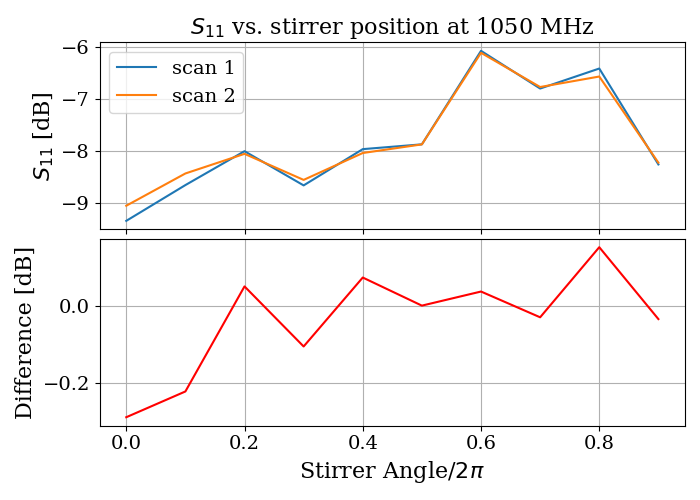

In [471]:
# Are positions reproducible? 
#In this cell, we compare the high res (300-320MHz) and low res (250-1050MHz) scan. These should be the same. 
freq = 1050 # note, different resolutions. 301.2, 304.4, 306 ..., 318.8 MHz show up exactly in both resolutions
                # 301.2 is bad!!!!! stirPos = 1278 and 1896 drop the first few hundred frequency points in the high res. VNA error
#choose dfs 10 use
df1 = df_rep1
df2 = df_rep3
df1Name = 'scan 1'
df2Name = 'scan 2'

#extract S parameters
#S11
posArr, S11_1  = get_s_at_frequency(freq, df1, "S11")
posArr, S11_2      = get_s_at_frequency(freq, df2, "S11")
#S12
posArr, S12_1  = get_s_at_frequency(freq, df1, "S12")
posArr, S12_2     = get_s_at_frequency(freq, df2, "S12")
#S22
posArr, S22_1  = get_s_at_frequency(freq, df1, "S22")
posArr, S22_2     = get_s_at_frequency(freq, df2, "S22")

plt.close('all')

#plot s11
fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Top subplot: S11 data plot.
axs[0].plot(posArr/4800, 20*np.log10(np.abs(S11_1)), label=df1Name)
axs[0].plot(posArr/4800, 20*np.log10(np.abs(S11_2)), label=df2Name)
axs[0].set_title(f'$S_{{11}}$ vs. stirrer position at {freq} MHz')
axs[0].set_ylabel(r'$S_{11}$ [dB]')
axs[0].legend()
axs[0].grid(True)

# Bottom subplot: residual plot.
residual = 20*np.log10(np.abs(S11_1)) - 20*np.log10(np.abs(S11_2))
axs[1].plot(posArr/4800, residual, color='red')
axs[1].set_xlabel(r'Stirrer Angle/$2\pi$')
axs[1].set_ylabel('Difference [dB]')
axs[1].grid(True)
plt.tight_layout()

plt.subplots_adjust(hspace=0.05)
plt.show()


#plot s12
fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Top subplot: S12 data plot.
axs[0].plot(posArr/4800, 20*np.log10(np.abs(S12_1)), label=df1Name)
axs[0].plot(posArr/4800, 20*np.log10(np.abs(S12_2)), label=df2Name)
axs[0].set_title(f'$S_{{12}}$ vs. stirrer position at {freq} MHz')
axs[0].set_ylabel(r'$S_{12}$ [dB]')
axs[0].legend()
axs[0].grid(True)

# Bottom subplot: residual plot.
residual = 20*np.log10(np.abs(S12_1)) - 20*np.log10(np.abs(S12_2))
axs[1].plot(posArr/4800, residual, color='red')
axs[1].set_xlabel(r'Stirrer Angle/$2\pi$')
axs[1].set_ylabel('Difference [dB]')
axs[1].grid(True)
plt.tight_layout()

plt.subplots_adjust(hspace=0.05)
plt.show()

#plot s22
fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Top subplot: S22 data plot.
axs[0].plot(posArr/4800, 20*np.log10(np.abs(S22_1)), label=df1Name)
axs[0].plot(posArr/4800, 20*np.log10(np.abs(S22_2)), label=df2Name)
axs[0].set_title(f'$S_{{22}}$ vs. stirrer position at {freq} MHz')
axs[0].set_ylabel(r'$S_{22}$ [dB]')
axs[0].legend()
axs[0].grid(True)

# Bottom subplot: residual plot.
residual = 20*np.log10(np.abs(S22_1)) - 20*np.log10(np.abs(S22_2))
axs[1].plot(posArr/4800, residual, color='red')
axs[1].set_xlabel(r'Stirrer Angle/$2\pi$')
axs[1].set_ylabel('Difference [dB]')
axs[1].grid(True)
plt.tight_layout()

plt.subplots_adjust(hspace=0.05)
plt.show()

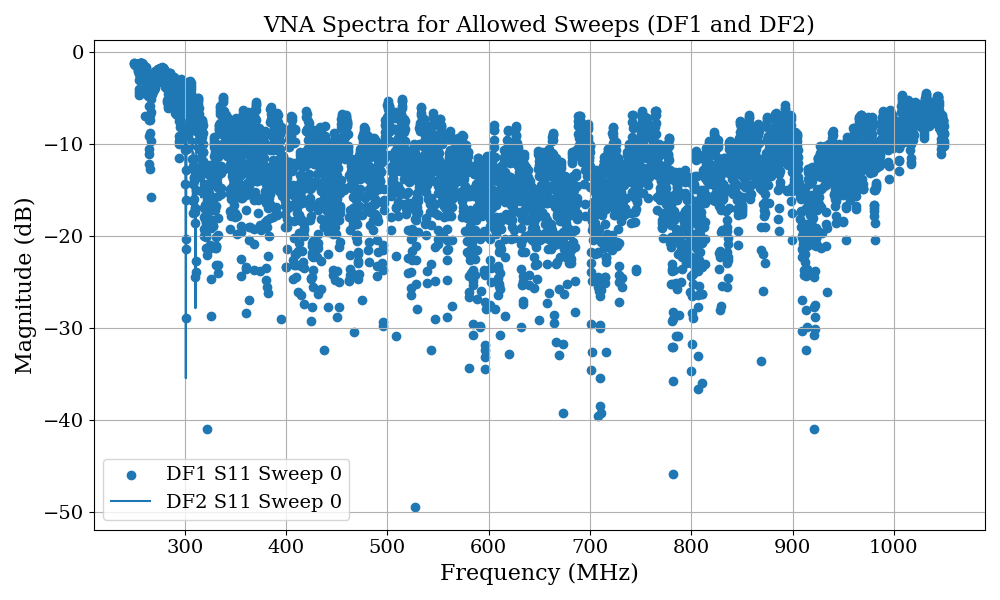

In [418]:
#Compare resolutions

import matplotlib.pyplot as plt
import numpy as np

# Specify the list of sweeps you want to plot.
allowed_sweeps = [0]

plt.figure(figsize=(10, 6))

# Plot data from df1.
for sweep, group in df.groupby("stirPos"):
    if sweep not in allowed_sweeps:
        continue  # skip sweeps not in the allowed list
    freqs = group["Freq_MHz"]
    s11_complex = group["S11"].apply(lambda x: complex(x) if isinstance(x, str) else x)
    s11_db = 20 * np.log10(np.abs(s11_complex))
    plt.scatter(freqs, s11_db, label=f"DF1 S11 Sweep {sweep}")
    #plt.plot(freqs, s22_db, marker='s', linestyle='-', label=f"DF1 S22 Sweep {sweep}")

# Plot data from high res.
for sweep, group in df_HR.groupby("stirPos"):
    if sweep not in allowed_sweeps:
        continue
    freqs = group["Freq_MHz"]
    s11_complex = group["S11"].apply(lambda x: complex(x) if isinstance(x, str) else x)
    s11_db = 20 * np.log10(np.abs(s11_complex))
    plt.plot(freqs, s11_db, label=f"DF2 S11 Sweep {sweep}")
    #plt.plot(freqs, s22_db, marker='s', linestyle='--', label=f"DF2 S22 Sweep {sweep}")

plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.title("VNA Spectra for Allowed Sweeps (DF1 and DF2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The following few cells perform some testing to compute the number of independent positions

Closest frequency: 299.955555 MHz
Closest frequency: 600.044444 MHz
Closest frequency: 800.044444 MHz
Closest frequency: 1000.044444 MHz


'stirPos, s12_array = get_s_at_frequency(f, df, "S12")\nplt.figure()\nplt.plot(stirPos/4800*360, abs(s12_array))\nplt.scatter(stirPos/4800*360, abs(s12_array), s = 12)'

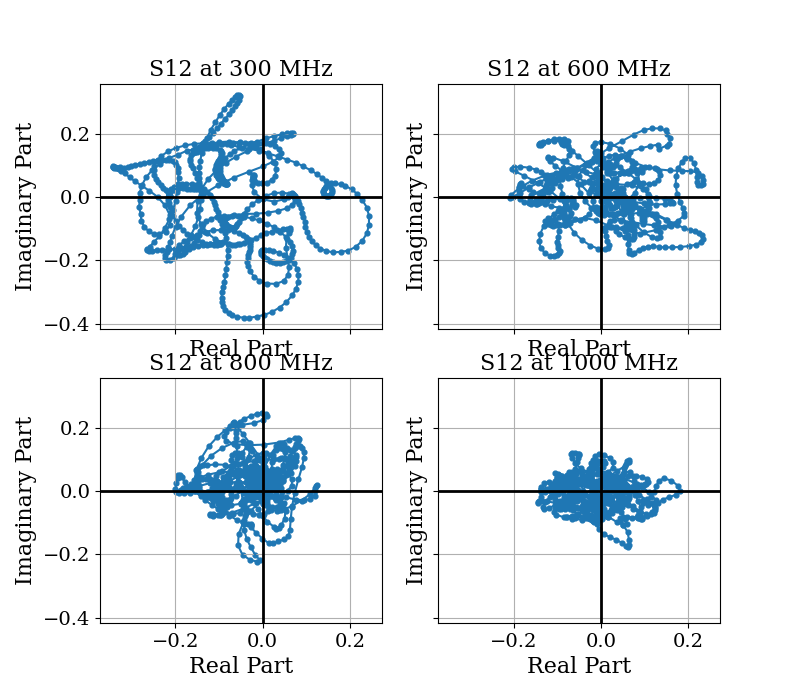

In [475]:
import matplotlib.pyplot as plt
import numpy as np

# Specify the list of target frequencies (in MHz).
target_freqs = [300, 600, 800, 1000]

# Prepare a list to hold the S12 arrays.
s12_arrays = []

# Get S12 data for each frequency.
for f in target_freqs:
    stirPos, s12_array = get_s_at_frequency(f, df_600Steps, "S12")
    s12_array = s12_array[::]
    s12_arrays.append(s12_array)

# Create a 2x2 grid of subplots.
fig, axs = plt.subplots(2, 2, figsize=(8, 7),sharex=True, sharey=True)
axs = axs.flatten()  # Flatten to a single list for easier iteration.

fig2, axs2 = plt.subplots(2, 2, figsize=(8, 7), sharex=True, sharey=True)
axs2 = axs2.flatten()

# Loop over the target frequencies and corresponding S12 arrays.
for i, f in enumerate(target_freqs):
    s12_arr = s12_arrays[i]
    axs[i].plot(np.real(s12_arr), np.imag(s12_arr))
    axs[i].scatter(np.real(s12_arr), np.imag(s12_arr), alpha = 1, s = 12)
    axs[i].set_xlabel("Real Part")
    axs[i].set_ylabel("Imaginary Part")
    axs[i].set_title(f"S12 at {f} MHz")
    axs[i].grid(True)
    # Add bold lines at the origin (0,0)
    axs[i].axhline(y=0, color='black', linewidth=2)
    axs[i].axvline(x=0, color='black', linewidth=2)

    #fig 2
    angle = stirPos/4800*360
    axs2[i].plot(angle, 20*np.log10(np.abs(s12_arr)))
    axs2[i].scatter(angle, 20*np.log10(np.abs(s12_arr)), s=12)
    axs2[i].set_xlabel("Stirrer Angle (°)")
    axs2[i].set_ylabel("S12 [dB]")
    axs2[i].set_title(f"|S12| at {f} MHz")
    axs2[i].grid(True)
    

plt.tight_layout()
plt.show()


'''stirPos, s12_array = get_s_at_frequency(f, df, "S12")
plt.figure()
plt.plot(stirPos/4800*360, abs(s12_array))
plt.scatter(stirPos/4800*360, abs(s12_array), s = 12)'''

Closest frequency: 1000.044444 MHz


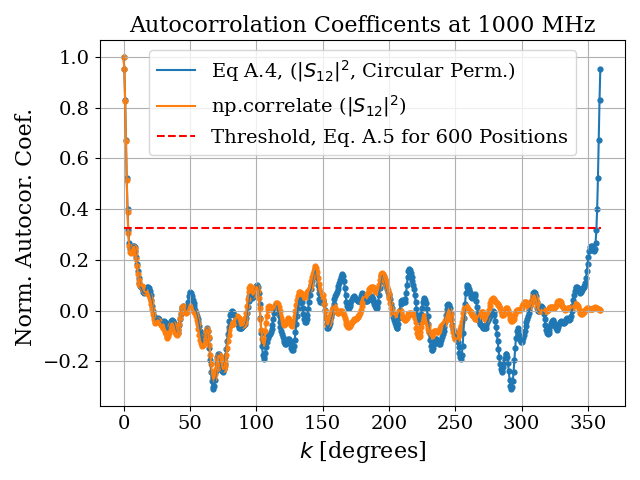

In [452]:
def tuner_efficiency_autocorr(S12):
    """
    Implements IEC 61000-4-21 Annex A.3 (Equation A.4) for
    tuner efficiency/autocorrelation at a single frequency.

    Parameters
    ----------
    S12 : np.ndarray
        1D array (length N) of complex S12 measurements,
        one value per stirrer position. 

    Returns
    -------
    r_array : np.ndarray
        1D array (length N) of correlation coefficients r(k),
        for circular shifts k = 0, 1, ..., N-1.
        r_array[0] should be 1.0 (perfect correlation at zero shift).
    """
    # 1) Convert to power-like data: x[i] = |S12[i]|^2
    x = np.abs(S12)
    N = len(x)
    #x_mean = x.mean()
    #x_zeromean = x - x_mean
    
    # 2) Precompute the mean and denominator portion for x
    ux = np.mean(x)
    sum_sq_x = np.sum((x - ux)**2)
    
    # Prepare output
    r_array = np.zeros(N, dtype=float)
    
    # 3) Loop over all possible shifts k
    for k in range(N):
        # Circularly shift x by k steps
        y = np.roll(x, -k)  # negative sign just a convention; either way is fine
        uy = np.mean(y)
        
        # Numerator: sum over i of (x_i - u_x)*(y_i - u_y)
        numerator = np.sum((x - ux) * (y - uy))
        
        # Denominator: sqrt( sum((x-ux)^2) * sum((y-uy)^2) )
        # But note y is just x shifted, so sum((y-uy)^2) = sum((x-ux)^2).
        sum_sq_y = np.sum((y - uy)**2)
        denom = np.sqrt(sum_sq_x * sum_sq_y)
        
        # Avoid division by zero if data is degenerate
        if denom == 0:
            r_array[k] = 0.0
        else:
            r_array[k] = numerator / denom
    
    return r_array


freq = 1000#783.3#427.7 #[MHz]
df_indPos = df_600Steps
stirPosArr, S12 = get_s_at_frequency(freq, df_indPos, "S12")
r_thresh = 0.37 * (1 - (7.22/len(S12)**0.64)) #EMC 4-21, Eq. A.5

x = (np.abs(S12)**2)- np.mean(np.abs(S12)**2)
raw_corr = np.correlate(x,x, mode="full")[int((len(stirPosArr)-1)):len(stirPosArr)*2]/np.sum(x**2)#75.3

plt.close('all')

if 0:
    plt.figure()
    plt.plot(tuner_efficiency_autocorr(S12), label = 'eq A.4')
    plt.plot(tuner_efficiency_autocorr(np.abs(S12)**2), label = 'eq A.4, S12^2')
    plt.plot(tuner_efficiency_autocorr((np.abs(S12))- np.mean(np.abs(S12))), label = 'eq A.4, S12, zero mean')
    plt.plot(tuner_efficiency_autocorr((np.abs(S12)**2)- np.mean(np.abs(S12)**2)), label = 'eq A.4, S12^2, zero mean')
    #plt.plot(tuner_efficiency_autocorr(np.random.normal(0,1,200)))
    #x = abs(S12)**2
    #plt.plot(autocorr_coeff(x))
    plt.hlines(r, 0, len(stirPosArr), 'r')
    plt.grid()
    plt.legend()



plt.figure()
plt.title(f'Autocorrolation Coefficents at {freq} MHz')
plt.plot(stirPosArr/4800*360, tuner_efficiency_autocorr((np.abs(S12)**2)), label = r'Eq A.4, ($|S_{12}|^2$, Circular Perm.)')
plt.plot(stirPosArr/4800*360, raw_corr, label = r'np.correlate ($|S_{12}|^2$)')
plt.scatter(stirPosArr/4800*360, tuner_efficiency_autocorr((np.abs(S12)**2)), s = 12)
plt.scatter(stirPosArr/4800*360, raw_corr, s = 12)
#plt.plot(tuner_efficiency_autocorr(np.random.normal(0,1,200)))
#x = abs(S12)**2
#plt.plot(autocorr_coeff(x))
plt.hlines(r_thresh, 0, 360, 'r', linestyles='--', label= f'Threshold, Eq. A.5 for {len(stirPosArr)} Positions')
plt.grid()
plt.xlabel(r"$k$ [degrees]")
plt.ylabel("Norm. Autocor. Coef. ")
plt.legend()
plt.tight_layout()

In [393]:
if 0:
    freqs = pd.unique(df["Freq_MHz"])
    r_thresh = 0.37 * (1 - (7.22/len(S12)**0.64))
    numPos = []
    freqSkip = 1 #takes a while if you plot all the freqs

    for freq in freqs[::freqSkip]:
        print(freq)
        stirPosArr, S12 = get_s_at_frequency(freq, df_indPos, "S12", printFreq=False)
        rArr = tuner_efficiency_autocorr(np.abs(S12)**2)

        #mask = rArr < r                 # True where correlation drops below threshold
        #k    = mask.argmax() if mask.any() else len(rArr)   # first crossing (or N if none)
        #print(k)
        #numPos.append(k)
        
        numPos.append(np.where(rArr < r_thresh)[0][0])
        
        #print(np.where(rArr < r)[0][0])
        #k = np.where(rArr < r)[0][0]                            # first crossing
        #numPos.append((k-1 + (r - rArr[k-1])/(rArr[k] - rArr[k-1])))


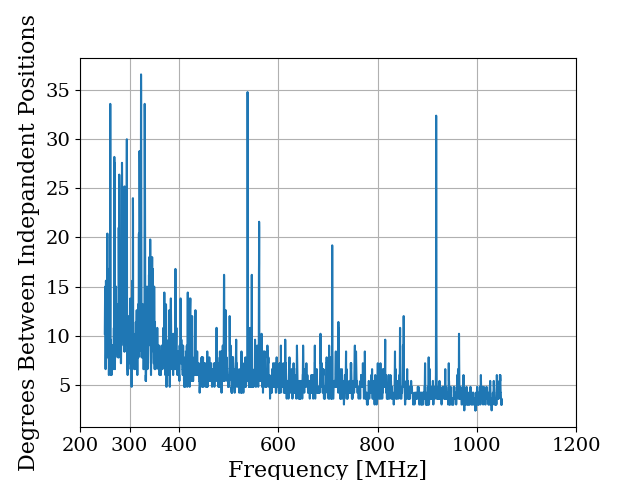

In [416]:
numPos = np.asarray(numPos)
freqs = pd.unique(df["Freq_MHz"])
plt.figure()
plt.plot(freqs[::freqSkip], numPos/600*360)
plt.grid()
plt.gca().set_xticks(list(plt.gca().get_xticks()) + [300])
#plt.xlim(270, 1050)
plt.ylabel('Degrees Between Indepandent Positions')
plt.xlabel('Frequency [MHz]')

avgBinLen = 100
plt.figure()
plt.plot(freqs[::freqSkip], 360/(numPos/600*360))
avg = np.convolve(600/numPos, np.ones(avgBinLen)/avgBinLen, mode='same')
plt.plot(freqs[avgBinLen:-avgBinLen:freqSkip], avg[avgBinLen:-avgBinLen], 'r-', lw=2, label=f'{avgBinLen}‑pt Rolling Avg')


plt.legend()
plt.grid()
plt.gca().set_xticks(list(plt.gca().get_xticks()) + [300])
#plt.xlim(270, 1050)
plt.ylabel('Number of Indepandent Positions')
plt.xlabel('Frequency [MHz]')
plt.tight_layout()

Now we have the number of independent stir positions. Next we start to compute ensamble averages.

In [476]:
def bootstrap_ensemble_mean(df, num_samples):
    """
    Draws `num_samples` stirPos values (with replacement) and computes the ensemble‐average
    S11, S12 and S22 at each frequency.
    
    Parameters:
      df (pd.DataFrame): must have columns ['stirPos','Freq_MHz','S11','S12','S22'] (S-params as complex dtype).
      num_samples (int): number of stirPos to draw with replacement.
    
    Returns:
      pd.DataFrame: indexed by Freq_MHz, with columns ['S11','S12','S22'] giving the averaged complex values.
    """
    # 1) collapse to one row per (stirPos,Freq_MHz) in case there are duplicates
    df_pos = df.groupby(['stirPos','Freq_MHz'])[['S11','S12','S22']].mean().reset_index()
    
    # 2) sample stirPos values with replacement
    unique_positions = df_pos['stirPos'].unique()
    draws = np.random.choice(unique_positions, size=num_samples, replace=True)
    
    # 3) replicate rows for each draw
    draws_df = pd.DataFrame({'stirPos': draws})
    sampled = draws_df.merge(df_pos, on='stirPos')
    
    # 4) group by frequency and average
    result = sampled.groupby('Freq_MHz')[['S11','S12','S22']].mean()
    return result

def ensamble_mean_all(df):
  mean_S = df.groupby("Freq_MHz")[["S11","S12","S22"]].mean()
  return mean_S

def rician_k(df, s_parameter):
    """
    Compute the Rician K‐factor per frequency:
      K(f) = |⟨S(f)⟩|²  /  ⟨ |S(f) − ⟨S(f)⟩|² ⟩
    
    where ⟨⋅⟩ is the average over all stirPos at that freq.
    
    Returns a pandas Series indexed by Freq_MHz.
    """
    return (
        df
        .groupby("Freq_MHz")[s_parameter]
        .apply(lambda x: 
            (np.abs(x.mean())**2) 
            / ((np.abs(x - x.mean())**2).mean())
        )
    )


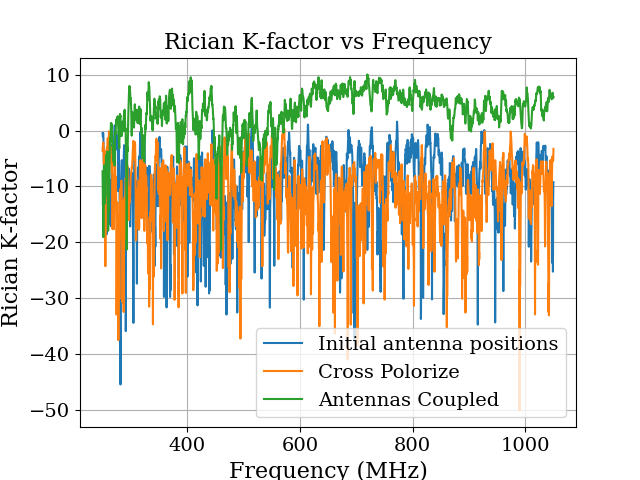

In [477]:
plt.close('all')
K_S11 = rician_k(df, "S12")
K_couple_S11 = rician_k(df_couple, "S12")
K_cp_S11 = rician_k(df_cp, "S12")

plt.figure()
plt.plot(K_S11.index, 10*np.log10(K_S11.values), label = 'Initial antenna positions')
plt.plot(K_cp_S11.index, 10*np.log10(K_cp_S11.values), label = 'Cross Polorize')
plt.plot(K_couple_S11.index, 10*np.log10(K_couple_S11.values), label = 'Antennas Coupled')
plt.xlabel("Frequency (MHz)")
plt.ylabel("Rician K‑factor")
plt.title("Rician K‑factor vs Frequency")
plt.grid(True)
#plt.ylim(-20, 10)
plt.legend()
plt.show()


In [478]:
#general plotting of S vs freq for a given list of positions

# Specify the list of sweeps you want to plot.
posArr = [0, 240, 4800-24]

# Create a new figure.
plt.figure(figsize=(10, 6))

# Group the data by sweep number and plot only the selected sweeps.
for sweep, group in df.groupby("stirPos"):
    if sweep not in posArr:
        continue  # Skip sweeps that are not in the allowed list
    freqs = group["Freq_MHz"]    
    #plt.plot(freqs, 20*np.log10(np.abs(group["S11"])), label=f"S11 Sweep {sweep}")
    #plt.plot(freqs, 20*np.log10(np.abs(group["S12"])), label=f"S12 Sweep {sweep}")
    #plt.plot(freqs, 20*np.log10(np.abs(group["S22"])), label=f"S22 Sweep {sweep}")

df_avgAll = ensamble_mean_all(df)
df_boot1 = bootstrap_ensemble_mean(df, 30)
df_boot2 = bootstrap_ensemble_mean(df, 30)

plt.plot(freqs, 20*np.log10(np.abs(df_avgAll["S12"])), label=f"S22 avg")
plt.plot(freqs, 20*np.log10(np.abs(df_boot1["S12"])))#, label=f" avg")
plt.plot(freqs, 20*np.log10(np.abs(df_boot2["S12"])))#, label=f"S22 avg")
# Label the plot appropriately.
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Hill book fig. 7.23
#THIS IS JOSEPH LEVINE CODE, NORRIS CODE IS IN CELL BELOW


# Create a new figure.
plt.figure(figsize=(10, 6))
df1 = df_rep1

mean_power_S11 = df1.groupby("Freq_MHz")["S11"] \
                  .apply(lambda x: (np.abs(x)**2).mean())

mean_power_S12 = df1.groupby("Freq_MHz")["S12"] \
                  .apply(lambda x: (np.abs(x)**2).mean())

mean_power_S22 = df1.groupby("Freq_MHz")["S22"] \
                  .apply(lambda x: (np.abs(x)**2).mean())
                  




plt.plot(freqs, mean_power_S11/mean_power_S12, label = r'$<|S_{11}|^2>/<|S_{12}|^2>$')
plt.plot(freqs, mean_power_S22/mean_power_S12, label = r'$<|S_{22}|^2>/<|S_{12}|^2>$')
plt.hlines(2, 250,1050, 'r',label= 'Theory value (Hill Eq. 7.237)')
# Label the plot appropriately.
plt.xlabel("Frequency (MHz)")
plt.ylabel("Linear ratio")
plt.legend()
plt.ylim(0, 4)
plt.grid(True)
plt.show()



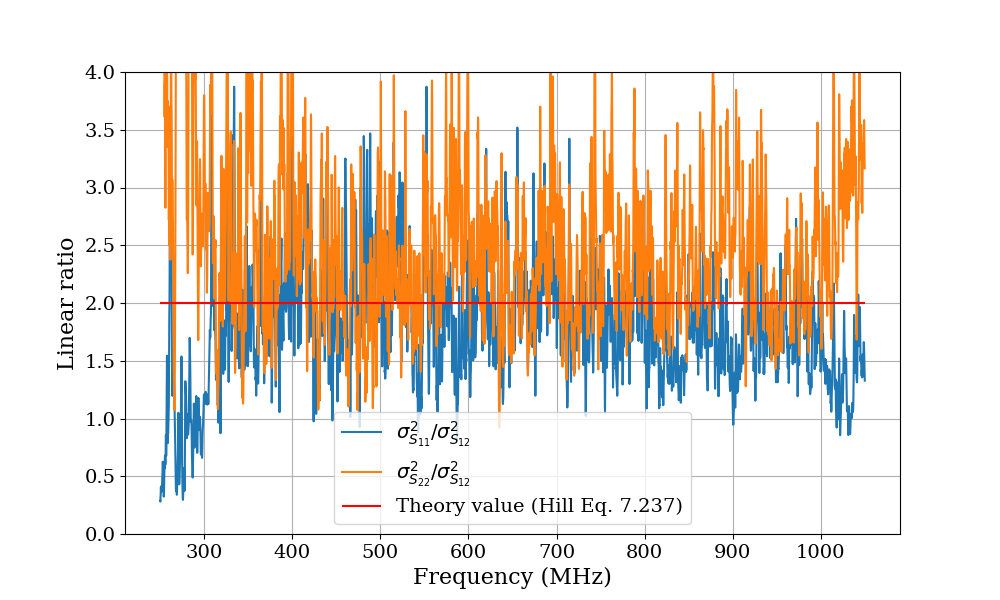

1.6439448238762089
0.34698692177991874


2.4910923125227433
0.5811616577804324


'\nfor i in range(len(freq_array)):\n    if freq_array[i] > 399 and freq_array[i] < 401:\n        print("400: " + str(i))\n    if freq_array[i] >899 and freq_array[i] < 901:\n        print("900: " + str(i))\n'

In [466]:
#Hill book fig. 7.23
#THIS IS JOSEPH LEVINE CODE, NORRIS CODE IS IN CELL BELOW
#The hill book says to use the variance of S11, S12 and S22, but the standard deviation also seems to work (arguably better)

varS11 = df.groupby("Freq_MHz")["S11"].apply(lambda x: np.var(x))

varS12 = df.groupby("Freq_MHz")["S12"].apply(lambda x: np.var(x))

varS22 = df.groupby("Freq_MHz")["S22"].apply(lambda x: np.var(x))
                  


plt.close()
plt.figure(figsize=(10, 6))
plt.plot(freq_array, varS11/varS12, label = r'$\sigma^2_{S_{11}} / \sigma^2_{S_{12}}$')
plt.plot(freq_array, varS22/varS12, label = r'$\sigma^2_{S_{22}} / \sigma^2_{S_{12}}$')
plt.hlines(2, 250,1050, 'r',label= 'Theory value (Hill Eq. 7.237)')
# Label the plot appropriately.
plt.xlabel("Frequency (MHz)")
plt.ylabel("Linear ratio")
plt.legend()
plt.ylim(0, 4)
plt.grid(True)
plt.show()


ratioS11S12 = varS11/varS12 # frequency range from 400MHz to 900MHz is approximately from points 839 to 3661
ratioS22S12 = varS22/varS12

print(np.mean(ratioS11S12[839:3661]))
print(np.std(ratioS11S12[839:3661]))
print("\n")
print(np.mean(ratioS22S12[839:3661]))
print(np.std(ratioS22S12[839:3661]))
"""
for i in range(len(freq_array)):
    if freq_array[i] > 399 and freq_array[i] < 401:
        print("400: " + str(i))
    if freq_array[i] >899 and freq_array[i] < 901:
        print("900: " + str(i))
"""


In [ ]:
# Test simple DataFrame with 3 stir positions and 3 frequencies, 9 rows total
df_test = pd.DataFrame({
    "stirPos":   [1, 1, 1,  2, 2, 2,  3, 3, 3],
    "Freq_MHz":  [1, 2, 3,  1, 2, 3,  1, 2, 3],
    "S11":       list(range(1, 10)),    # 1, 2, …, 9
    "S12":       list(range(10, 19)),   # 10, 11, …, 18
    "S22":       list(range(19, 28)),   # 19, 20, …, 27
})

print(df_test)
mean_power_S11 = df_test.groupby("Freq_MHz")["S11"] \
                    .apply(lambda x: (np.abs(x)**2).mean())
print(mean_power_S11)
if 1:
    mean_power_S11 = df_test.groupby("Freq_MHz")["S11"] \
                    .apply(lambda x: (np.abs(x)**2).mean())
    mean_power_S12 = df_test.groupby("Freq_MHz")["S12"] \
                    .apply(lambda x: (np.abs(x)**2).mean())
    mean_power_S22 = df_test.groupby("Freq_MHz")["S22"] \
                    .apply(lambda x: (np.abs(x)**2).mean())
    print('######## S11 ########')
    print(mean_power_S11)
    print('Manual calc for freq 1: ', np.mean([1**2, 4**2, 7**2]))
    print('Manual calc for freq 2: ', np.mean([2**2, 5**2, 8**2]))
    print('Manual calc for freq 3: ', np.mean([3**2, 6**2, 9**2]))

    print('######## S12 ########')
    print(mean_power_S12)
    print('Manual calc for freq 1: ', np.mean([10**2, 13**2, 16**2]))
    print('Manual calc for freq 2: ', np.mean([11**2, 14**2, 17**2]))
    print('Manual calc for freq 3: ', np.mean([12**2, 15**2, 18**2]))

    print('######## S22 ########')
    print(mean_power_S22)
    print('Manual calc for freq 1: ', np.mean([19**2, 22**2, 25**2]))
    print('Manual calc for freq 2: ', np.mean([20**2, 23**2, 26**2]))
    print('Manual calc for freq 3: ', np.mean([21**2, 24**2, 27**2]))

   stirPos  Freq_MHz  S11  S12  S22
0        1         1    1   10   19
1        1         2    2   11   20
2        1         3    3   12   21
3        2         1    4   13   22
4        2         2    5   14   23
5        2         3    6   15   24
6        3         1    7   16   25
7        3         2    8   17   26
8        3         3    9   18   27
Freq_MHz
1    22.0
2    31.0
3    42.0
Name: S11, dtype: float64
######## S11 ########
Freq_MHz
1    22.0
2    31.0
3    42.0
Name: S11, dtype: float64
Manual calc for freq 1:  22.0
Manual calc for freq 2:  31.0
Manual calc for freq 3:  42.0
######## S12 ########
Freq_MHz
1    175.0
2    202.0
3    231.0
Name: S12, dtype: float64
Manual calc for freq 1:  175.0
Manual calc for freq 2:  202.0
Manual calc for freq 3:  231.0
######## S22 ########
Freq_MHz
1    490.0
2    535.0
3    582.0
Name: S22, dtype: float64
Manual calc for freq 1:  490.0
Manual calc for freq 2:  535.0
Manual calc for freq 3:  582.0


In [ ]:
df_test.groupby("Freq_MHz")["S11"].apply(lambda x: np.var(x))
print(np.var([1,4,7]))

6.0


In [ ]:
np.var([1**2,4**2,7**2])

402.0

/tmp/ipykernel_2043171/4270936086.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


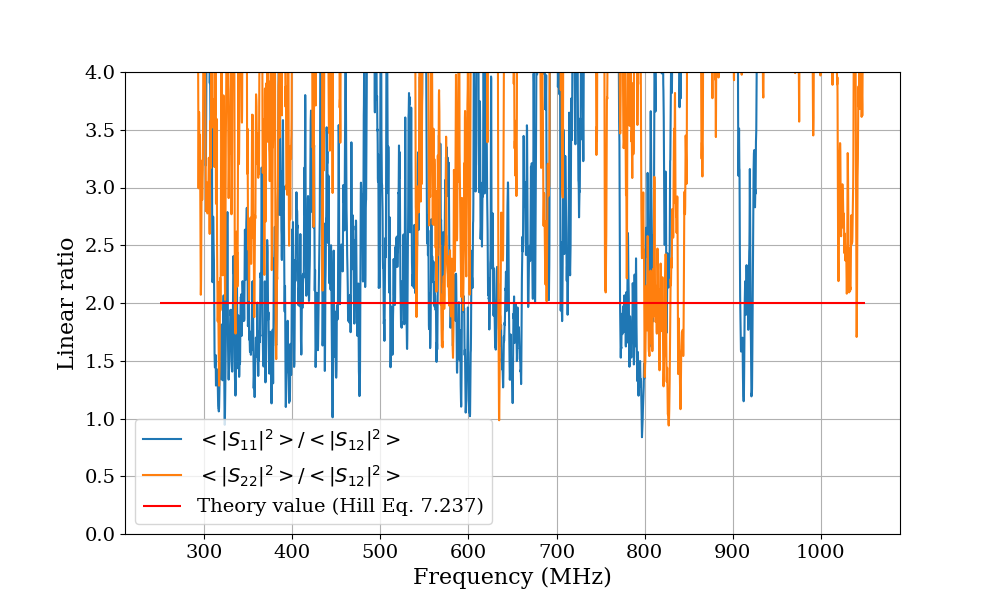

In [ ]:
#Hill book fig. 7.23


# Create a new figure.
plt.figure(figsize=(10, 6))
df1 = df

mean_power_S12 = df1.groupby("Freq_MHz")["S12"] \
                  .apply(lambda x: (np.abs(x)**2).mean())

mean_power_S22 = df1.groupby("Freq_MHz")["S22"] \
                  .apply(lambda x: (np.abs(x)**2).mean())
                  



plt.close('all')
plt.plot(freqs, mean_power_S11/mean_power_S12, label = r'$<|S_{11}|^2>/<|S_{12}|^2>$')
plt.plot(freqs, mean_power_S22/mean_power_S12, label = r'$<|S_{22}|^2>/<|S_{12}|^2>$')
plt.hlines(2, 250,1050, 'r',label= 'Theory value (Hill Eq. 7.237)')
# Label the plot appropriately.
plt.xlabel("Frequency (MHz)")
plt.ylabel("Linear ratio")
plt.legend()
plt.ylim(0, 4)
plt.grid(True)
plt.show()



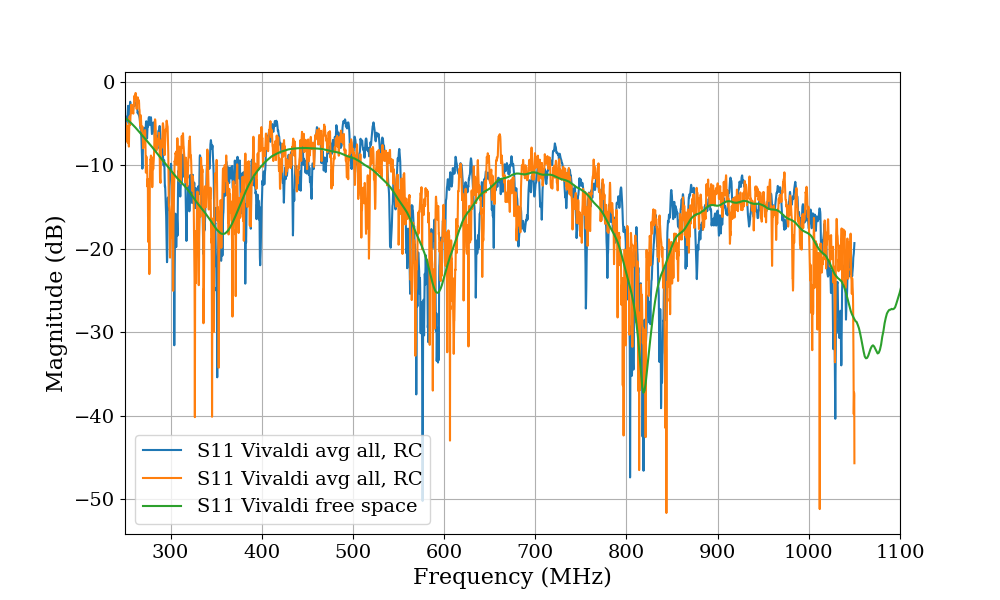

In [483]:
#Compare S11 in RC to free space. Only for Vivaldi

df_RC = df_600Steps

filename = "/drBigBoy/darkRadio/daqAnalysisAndExperiments/reverbChamberTesting/data_gitignore/VivaldiS11Magnitudecsv.csv"
d = pd.read_csv(filename)
f = d['Frequency']
s11 = d['S11_Magnitude']

#df_FS   = pd.read_csv(directory 
#        + "VivaldiS11_freeSpace_complex_4_18_25.csv")
#df_FS["S11"] = df_FS["S11"] 
#df_RC.groupby("Freq_MHz")[["S11","S12","S22"]].mean()


#general plotting of S vs freq for a given list of positions

# Specify the list of sweeps you want to plot.
posArr = [0, 240, 4800-24]

# Create a new figure.
plt.figure(figsize=(10, 6))

# Group the data by sweep number and plot only the selected sweeps.
for sweep, group in df.groupby("stirPos"):
    if sweep not in posArr:
        continue  # Skip sweeps that are not in the allowed list
    freqs = group["Freq_MHz"]    
    #plt.plot(freqs, 20*np.log10(np.abs(group["S11"])), label=f"S11 Sweep {sweep}")
    #plt.plot(freqs, 20*np.log10(np.abs(group["S12"])), label=f"S12 Sweep {sweep}")
    #plt.plot(freqs, 20*np.log10(np.abs(group["S22"])), label=f"S22 Sweep {sweep}")

df_avgAll = ensamble_mean_all(df)

plt.plot(freqs, 20*np.log10(np.abs(ensamble_mean_all(df)["S22"])), label=f"S11 Vivaldi avg all, RC")
plt.plot(freqs, 20*np.log10(np.abs(ensamble_mean_all(df_rep2)["S22"])), label=f"S11 Vivaldi avg all, RC")
plt.plot(f/1e6, s11, label=f"S11 Vivaldi free space")
# Label the plot appropriately.
plt.xlabel("Frequency (MHz)")
plt.xlim(250, 1100)
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid(True)
plt.show()